In [30]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 


In [36]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [19]:
# creating a subset of the data for the area, amount of rooms and the price.
df_subset = df[['area', 'price','rooms']]

In [20]:
df_subset = df_subset[df_subset['price'] > 30000]
df_subset = df_subset[df_subset['rooms'] >= 1]
df_subset = df_subset[df_subset['area'] >= 1]

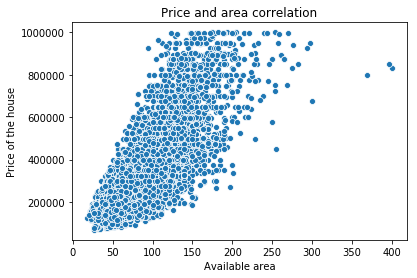

In [21]:
sns.scatterplot(x="area", y="price", data=df_subset)
plt.xlabel('Available area')
plt.ylabel('Price of the house')
plt.title('Price and area correlation')
plt.show()

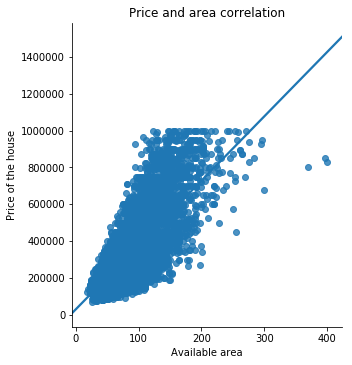

In [22]:
sns.lmplot(x="area", y="price", data=df_subset, ci= False)
plt.xlabel('Available area')
plt.ylabel('Price of the house')
plt.title('Price and area correlation')
plt.show()

In [59]:
# filling in the right info for the formula
x = df[['area']] 
y = df['price']
lm = LinearRegression()
lm.fit(x, y) 

b0 = lm.coef_[0]
b1 = lm.intercept_ 

$ y = 3498.81 + 27983.93X$ 

In [60]:
# checking the formula by hand
# doesn't get the same info as the predict...
y=3498.81+27983.93*70
y

1962373.9100000001

In [61]:
lm.predict(70)

array([286894.17672918])

In [66]:
# making a new column in the DF.
df['p_price'] = lm.predict(x)

In [67]:
# looking for the right address.
df[df['address'] == 'Slichtenhorststraat 10'].head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,p_price
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,234500,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,337034.858615
